# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [20]:
base = pd.read_csv('c:\\Users\\55819\\Desktop\\Exercícios ebac\\df_var_base_dm.csv')
base.head(2)

,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,posse_de_veiculo_Y,posse_de_imovel_Y
0,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False,True,True,True
1,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False,False,False,True


In [21]:
base.mau.unique()

array([False,  True])

In [22]:
base.dtypes

qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
sexo_M                      bool
posse_de_veiculo_Y          bool
posse_de_imovel_Y           bool
dtype: object

'Working':1,

'Commercial associate':2,

'State servant':3,

 'Pensioner':4,
 
 'Student':5

In [23]:
base.tipo_renda = base.tipo_renda.map({'Working':1,
                                       'Commercial associate':2,
                                       'State servant':3,
                                       'Pensioner':4,
                                       'Student':5})

'Secondary / secondary special':0,

'Higher education':1,

 'Incomplete higher':2,

 'Lower secondary':3,
 
  'Academic degree':4

In [24]:
base['educacao'] = base['educacao'].map({'Secondary / secondary special':0,
                                         'Higher education':1,
                                         'Incomplete higher':2,
                                         'Lower secondary':3,
                                         'Academic degree':4,})


Married':0,

'Single / not married':1,

'Civil marriage':2,

'Widow':3,

'Separated':4

In [25]:
base['estado_civil'] = base['estado_civil'].map({'Married':0,
                                                  'Single / not married':1,
                                                    'Civil marriage':2,
                                                      'Widow':3,
                                                 'Separated':4})

'House / apartment':0,

 'Rented apartment':1,

'Municipal apartment':2,

 'With parents':3,

 'Co-op apartment':4,
 
 'Office apartment':5


In [26]:
base['tipo_residencia'] = base['tipo_residencia'].map({'House / apartment':0,
                                                        'Rented apartment':1,
                                                          'Municipal apartment':2,
                                                        'With parents':3,
                                                        'Co-op apartment':4,
                                                        'Office apartment':5})

In [27]:
base.tipo_residencia.unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

SEPARANDO AS VARIAVEIS TARGET

In [28]:
y = base['mau']

In [29]:
X = base.drop('mau',axis=1)

SEPARANDO ENTRE TREINO(70) E TESTE(30)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3 , random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [31]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train,y_train)

In [32]:
y_predictc  =clf.predict(X_test)
y_predictc

array([False, False, False, ..., False, False, False])

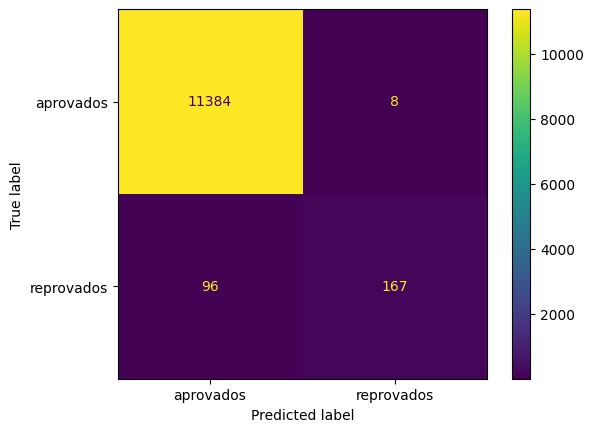

In [33]:
cm = confusion_matrix(y_train,clf.predict(X_train),labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['aprovados','reprovados'])
MatrizDeConfusao.plot()

In [34]:
(11384 + 167)/ (11384+8+96+167)

0.991076791076791

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [35]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train,y_train)
predict = clf.predict(X_test)


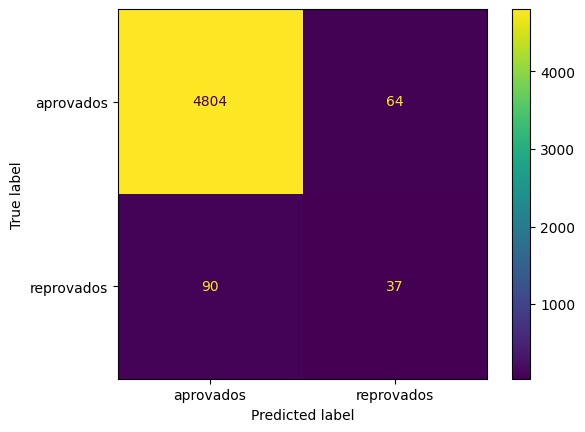

In [36]:
cm = confusion_matrix(y_test,clf.predict(X_test),labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['aprovados','reprovados'])
MatrizDeConfusao.plot()

In [37]:
accuracy_score(y_test,y_predictc)

0.9691691691691692

a acc_train ficou >> 0.99 

e a acc_test >> 0.96

tivemos uma pequena queda na acc então o sistema está bom

In [38]:
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf = clf.fit(X_train,y_train)
predict = clf.predict(X_test)


[Text(0.55044795221843, 0.9545454545454546, 'tempo_emprego <= 2.848\ngini = 0.044\nsamples = 11655\nvalue = [11392, 263]\nclass = reprovados'),
 Text(0.2664249146757679, 0.8636363636363636, 'tempo_emprego <= 2.845\ngini = 0.059\nsamples = 4279\nvalue = [4149, 130]\nclass = reprovados'),
 Text(0.259598976109215, 0.7727272727272727, 'idade <= 30.175\ngini = 0.058\nsamples = 4273\nvalue = [4145, 128]\nclass = reprovados'),
 Text(0.11049488054607509, 0.6818181818181818, 'educacao <= 1.5\ngini = 0.116\nsamples = 438\nvalue = [411, 27]\nclass = reprovados'),
 Text(0.0674061433447099, 0.5909090909090909, 'idade <= 30.137\ngini = 0.084\nsamples = 387\nvalue = [370, 17]\nclass = reprovados'),
 Text(0.060580204778156996, 0.5, 'tempo_emprego <= 0.693\ngini = 0.071\nsamples = 380\nvalue = [366.0, 14.0]\nclass = reprovados'),
 Text(0.027303754266211604, 0.4090909090909091, 'sexo_M <= 0.5\ngini = 0.15\nsamples = 86\nvalue = [79.0, 7.0]\nclass = reprovados'),
 Text(0.013651877133105802, 0.31818181818

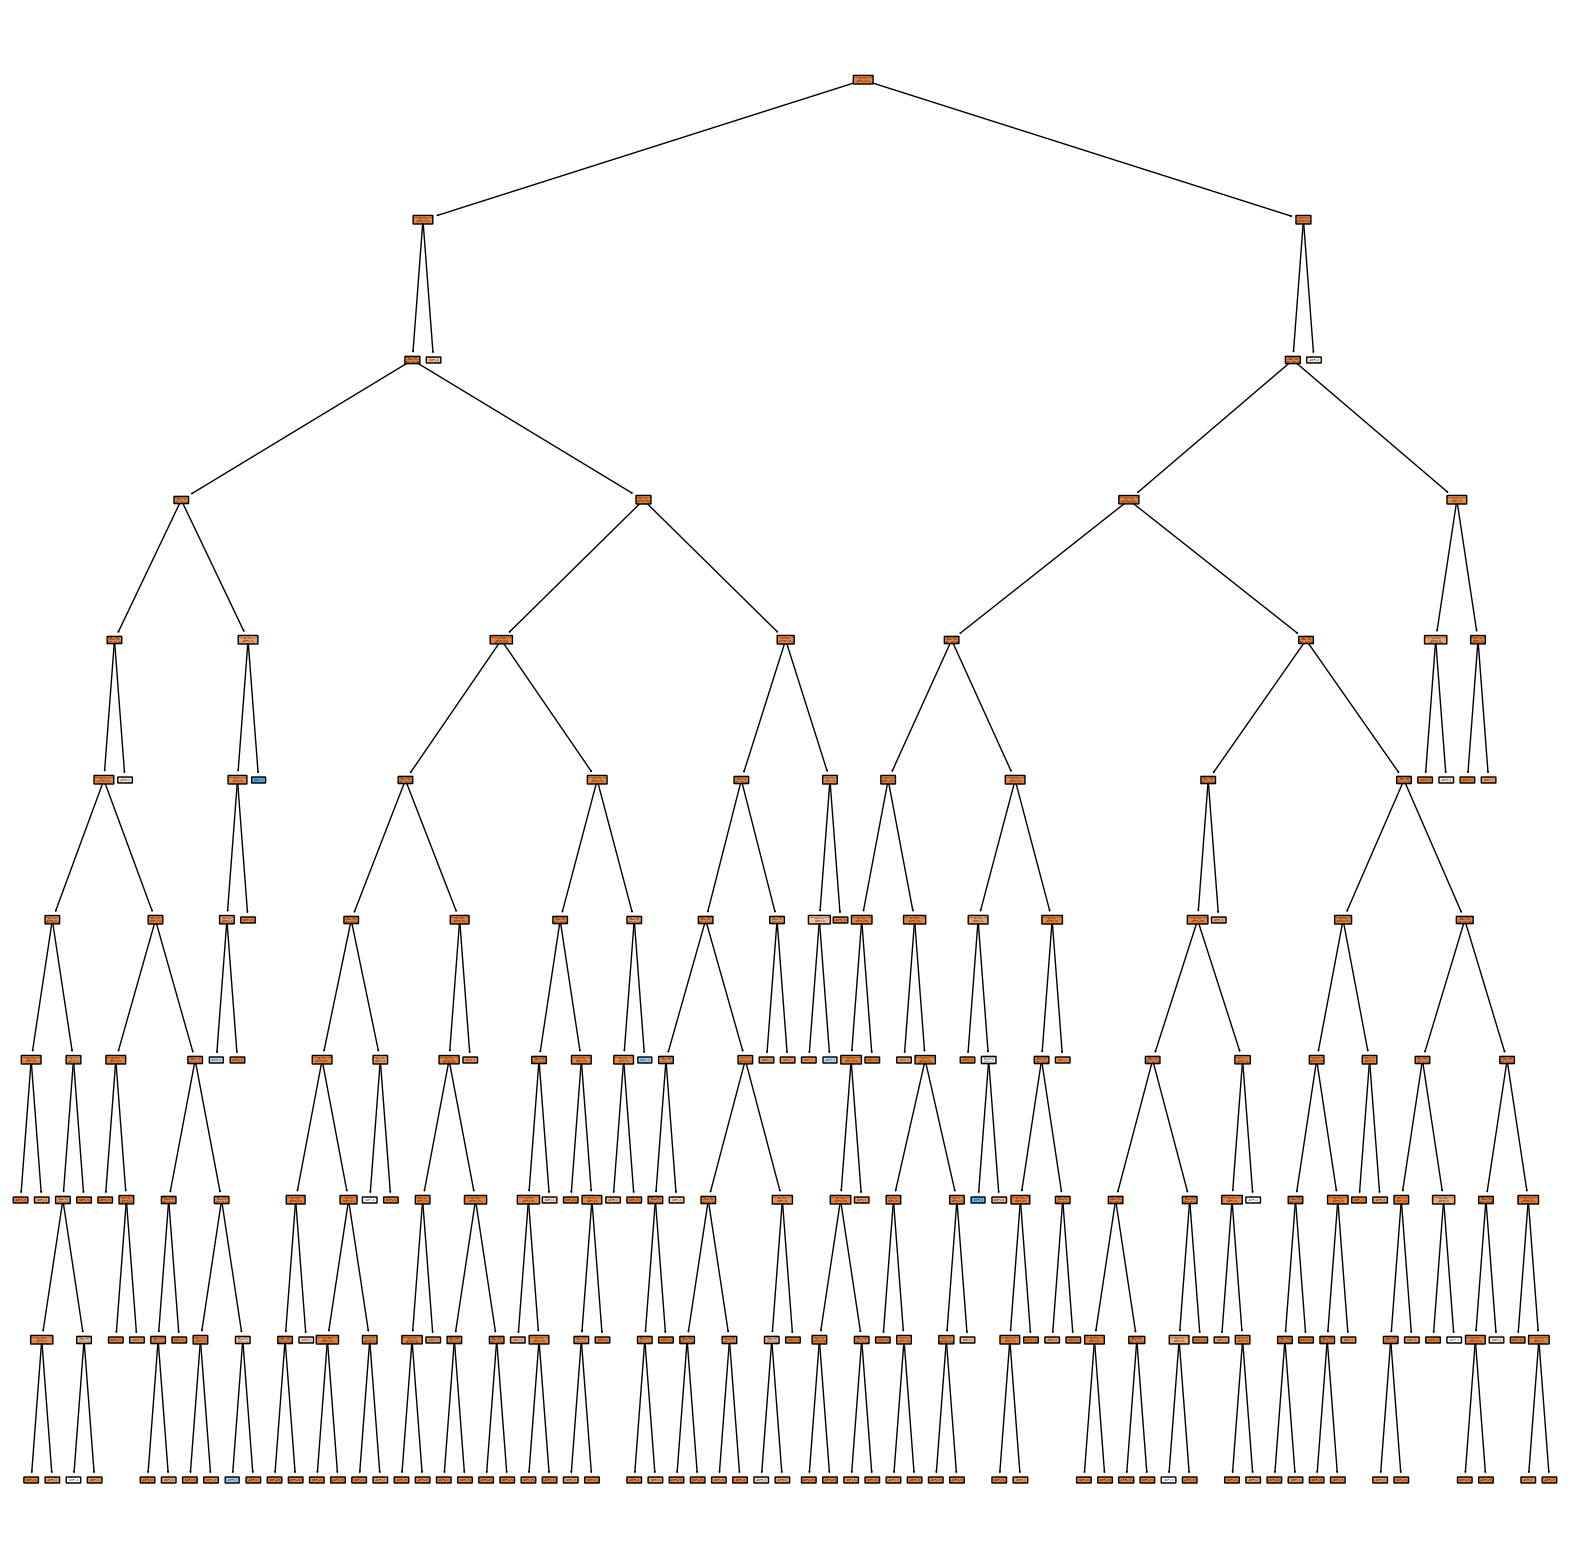

In [39]:
plt.figure(figsize=[20,20])
plot_tree(clf,
         filled=True,
         rounded=True,
         class_names=['reprovados', 'aprovados'],
         feature_names=list(X_test.columns))

In [41]:
predict = clf.predict(X_test)

In [47]:
proporcao_aprovados = (predict==0).sum()/len(predict)
proporcao_reprovados = (predict==1).sum()/len(predict)

print(f'{proporcao_aprovados}       {proporcao_reprovados}')

0.9943943943943944       0.005605605605605605


In [48]:
(4868+0) / (4868 + 0 + 127 + 0)

0.9745745745745745